In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esa-adb-challenge/train.parquet
/kaggle/input/esa-adb-challenge/sample_submission.parquet
/kaggle/input/esa-adb-challenge/target_channels.csv
/kaggle/input/esa-adb-challenge/test.parquet


In [2]:
df = pd.read_parquet("/kaggle/input/esa-adb-challenge/train.parquet")

df.head()

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40,is_anomaly
0,0,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
print(f"The dataset has {df.shape[0]:,} records")

The dataset has 14,728,321 records


In [4]:
targets_df = pd.read_csv("/kaggle/input/esa-adb-challenge/target_channels.csv")
targets_df.shape

(58, 1)

In [5]:
targets_df.head()

,target_channels
0,channel_12
1,channel_13
2,channel_14
3,channel_15
4,channel_16


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the target channels list
targets_df = pd.read_csv("/kaggle/input/esa-adb-challenge/target_channels.csv")
target_channels = targets_df['target_channels'].tolist()

# Read the train dataset
df_train = pd.read_parquet("/kaggle/input/esa-adb-challenge/train.parquet")

# Display basic info
print("Train dataset shape:", df_train.shape)
print(df_train.head())

# Plot all target channels over time
plt.figure(figsize=(15, 8))
for channel in target_channels:
    if channel in df_train.columns:
        plt.plot(df_train['id'], df_train[channel], label=channel)

plt.xlabel("Time Index")
plt.ylabel("Sensor Value")
plt.title("Target Channels Over Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Train dataset shape: (14728321, 89)
   id  channel_1  channel_10  channel_11  channel_12  channel_13  channel_14  \
0   0    0.13791         0.0         0.0    0.317175    0.371764    0.297205   
1   1    0.13791         0.0         0.0    0.317175    0.371764    0.297205   
2   2    0.13791         0.0         0.0    0.317175    0.371764    0.297205   
3   3    0.13791         0.0         0.0    0.317175    0.371764    0.297205   
4   4    0.13791         0.0         0.0    0.317175    0.371764    0.297205   

   channel_15  channel_16  channel_17  ...  telecommand_351  telecommand_352  \
0    0.130113    0.766769    0.349474  ...              0.0              0.0   
1    0.130113    0.766769    0.349474  ...              0.0              0.0   
2    0.130113    0.766769    0.349474  ...              0.0              0.0   
3    0.130113    0.766769    0.349474  ...              0.0              0.0   
4    0.130113    0.766769    0.349474  ...              0.0              0.0   

  

In [7]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm import tqdm
# import os
# import time
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

# # For structure learning
# from pgmpy.estimators import PC
# from pgmpy.estimators.CITests import chi_square

# # For Bayesian networks
# from pgmpy.models import BayesianNetwork, DynamicBayesianNetwork
# from pgmpy.inference import VariableElimination
# from pgmpy.factors.discrete import TabularCPD
# from pgmpy.sampling import BayesianModelSampling

# # For CTBN (we'll use PyPSA-CTBN as an example)
# # pip install pypsa-ctbn  # You would need to install this
# # import pyCTBN

# # For parallel processing
# from joblib import Parallel, delayed

# # Step 1: Load and Explore the Data
# def load_data():
#     print("Loading data...")
#     # Load target channels list
#     target_channels = pd.read_csv("/kaggle/input/esa-adb-challenge/target_channels.csv")
#     target_channels_list = target_channels['target_channels'].tolist()
    
#     # Load a subset of the training data to manage memory
#     # We'll use a windowing approach for full processing
#     train_data = pd.read_parquet("/kaggle/input/esa-adb-challenge/train.parquet")
#     train_data = train_data.iloc[100000]
    
#     # Identify telecommand channels
#     telecommand_cols = [col for col in train_data.columns if col.startswith('telecommand_')]
    
#     # Identify auxiliary channels (non-target, non-telecommand)
#     all_cols = set(train_data.columns)
#     auxiliary_cols = list(all_cols - set(target_channels_list) - set(telecommand_cols) - {'id', 'is_anomaly'})
    
#     print(f"Data loaded. Shape: {train_data.shape}")
#     print(f"Target channels: {len(target_channels_list)}")
#     print(f"Telecommand channels: {len(telecommand_cols)}")
#     print(f"Auxiliary channels: {len(auxiliary_cols)}")
    
#     return train_data, target_channels_list, telecommand_cols, auxiliary_cols

# # Step 2: Data Preprocessing and Windowing
# def preprocess_data(data, window_size=10000, overlap=1000):
#     """
#     Preprocess data and create overlapping windows for efficient processing
#     """
#     print("Preprocessing data...")
    
#     # Scale numerical features
#     scaler = StandardScaler()
#     numerical_cols = [col for col in data.columns if col not in ['id', 'is_anomaly']]
#     data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
#     # Create overlapping windows
#     windows = []
#     for start_idx in tqdm(range(0, len(data) - window_size, window_size - overlap)):
#         end_idx = start_idx + window_size
#         windows.append(data.iloc[start_idx:end_idx].copy())
    
#     print(f"Created {len(windows)} windows")
#     return windows, scaler

# # Step 3: Structure Learning
# def learn_causal_structure(data, target_channels, telecommand_cols, max_channels=6):
#     """
#     Learn the causal structure using PC algorithm
#     Start with a subset of target channels (e.g., channels 41-46)
#     """
#     print("Learning causal structure...")
    
#     # Starting with the recommended subset (channels 41-46)
#     # Extract the column names for these channels
#     subset_channels = [col for col in target_channels if int(col.split('_')[1]) in range(41, 47)]
    
#     if len(subset_channels) > max_channels:
#         subset_channels = subset_channels[:max_channels]
    
#     # Include telecommands as they represent interventions
#     variables = subset_channels + telecommand_cols
    
#     # Create a discretized version for structure learning
#     # This is a simplification - in practice, you might use domain knowledge or more sophisticated discretization
#     discretized_data = data[variables].copy()
#     for col in variables:
#         # Simple 3-bin discretization for demonstration
#         discretized_data[col] = pd.qcut(data[col], 3, labels=False, duplicates='drop')
    
#     # Learn structure using PC algorithm
#     pc = PC(data=discretized_data)
#     skeleton = pc.estimate(significance_level=0.05, variant="stable")
    
#     print(f"Learned structure with {len(skeleton.edges())} edges")
#     return skeleton

# # Step 4: Hybrid PGM Model Construction
# class HybridPGM:
#     def __init__(self, structure, dbn_weight=0.7):
#         self.structure = structure
#         self.dbn_weight = dbn_weight  # Weight for balancing DBN vs CTBN
#         self.dbn = None
#         # We'll simulate CTBN here since implementation is complex
#         self.ctbn_initialized = False
    
#     def fit(self, data, telecommand_cols):
#         """
#         Fit the hybrid model to the data
#         """
#         print("Fitting hybrid PGM model...")
        
#         # Extract the variables from the structure
#         variables = list(self.structure.nodes())
        
#         # 1. Fit DBN component
#         print("Fitting DBN component...")
#         # Create two-slice DBN (simplified)
#         dbn_edges = []
        
#         # Intra-slice edges from the learned structure
#         intra_edges = list(self.structure.edges())
#         for edge in intra_edges:
#             dbn_edges.append((edge[0], edge[1], 0))  # Within the same time slice
        
#         # Inter-slice edges (time dependencies)
#         for var in variables:
#             if var not in telecommand_cols:  # Telecommands don't have temporal persistence
#                 dbn_edges.append((var, var, 1))  # Temporal persistence

#         # Create the DBN model (simplified)
#         self.dbn = DynamicBayesianNetwork(dbn_edges)
        
#         # Fit parameters (in practice, you'd use MaximumLikelihoodEstimator)
#         # For simplicity, we're just initializing with random CPDs
#         for var in variables:
#             n_states = len(data[var].unique())
#             parents = list(self.dbn.get_parents(var))
#             if not parents:
#                 # No parents - use empirical distribution
#                 values = np.random.dirichlet(np.ones(n_states))
#                 cpd = TabularCPD(var, n_states, [values])
#             else:
#                 # With parents - create random CPD
#                 parent_states = [len(data[parent].unique()) for parent in parents]
#                 cardinality = np.prod(parent_states)
#                 values = np.random.dirichlet(np.ones(n_states), size=int(cardinality)).T
#                 cpd = TabularCPD(var, n_states, values, parents, parent_states)
            
#             # In practice, you would add the CPD to the model
#             # self.dbn.add_cpds(cpd)
        
#         # 2. CTBN component (simulated)
#         print("Simulating CTBN component...")
#         self.ctbn_initialized = True
        
#         print("Model fitting complete")
#         return self
    
#     def predict_anomalies(self, data, threshold=3.0):
#         """
#         Detect anomalies using the hybrid model
#         """
#         print("Detecting anomalies...")
        
#         # Simulate anomaly scores
#         # In a real implementation, this would use the model to compute log-likelihoods
#         anomaly_scores = np.zeros(len(data))
        
#         # DBN component: simulate log-likelihood scores
#         # This should be replaced with actual inference on the DBN
#         dbn_scores = np.random.normal(0, 1, len(data))
        
#         # CTBN component: simulate intensity scores
#         # This should be replaced with actual intensity computations from the CTBN
#         ctbn_scores = np.random.normal(0, 1, len(data))
        
#         # Combine scores using the weighting parameter
#         anomaly_scores = -(self.dbn_weight * dbn_scores + (1 - self.dbn_weight) * ctbn_scores)
        
#         # Identify anomalies where score exceeds threshold
#         predictions = (anomaly_scores > threshold).astype(int)
        
#         print(f"Detected {predictions.sum()} anomalies")
#         return predictions, anomaly_scores

# # Step 5: Telecommand Handling
# def process_telecommands(data, telecommand_cols):
#     """
#     Process telecommands and identify operational mode changes
#     """
#     print("Processing telecommands...")
    
#     # Detect operational mode changes based on telecommands
#     mode_changes = np.zeros(len(data))
    
#     for col in telecommand_cols:
#         # Mark when telecommand is activated
#         mode_changes += data[col].diff().fillna(0).abs()
    
#     # Flag time points where mode changes occur
#     mode_change_points = np.where(mode_changes > 0)[0]
    
#     print(f"Identified {len(mode_change_points)} operational mode change points")
#     return mode_change_points

# # Step 6: Anomaly Interpretation
# def interpret_anomalies(data, structure, anomaly_indices, target_channels):
#     """
#     Provide interpretable explanations for detected anomalies
#     """
#     print("Interpreting anomalies...")
    
#     # Get variables from structure
#     variables = list(structure.nodes())
    
#     # Subset to target channels for interpretation
#     target_vars = [var for var in variables if var in target_channels]
    
#     explanations = []
    
#     # For each anomaly, provide an explanation
#     for idx in anomaly_indices[:min(10, len(anomaly_indices))]:  # Limit to 10 for demonstration
#         # Find channels that deviate most at this time point
#         deviations = {}
#         for var in target_vars:
#             # Simple Z-score deviation (would be more sophisticated in practice)
#             deviations[var] = abs(data.iloc[idx][var])
        
#         # Sort channels by deviation
#         sorted_devs = sorted(deviations.items(), key=lambda x: x[1], reverse=True)
        
#         # Identify potential root cause (most deviated channel)
#         root_cause = sorted_devs[0][0]
        
#         # Find potential causal pathway
#         causal_path = []
#         for var, dev in sorted_devs[1:3]:  # Next 2 most deviated channels
#             # Check if there's a path from root cause to this channel
#             if (root_cause, var) in structure.edges() or (var, root_cause) in structure.edges():
#                 causal_path.append(var)
        
#         # Create explanation
#         explanation = {
#             'time_index': idx,
#             'root_cause': root_cause,
#             'deviation': sorted_devs[0][1],
#             'causal_path': causal_path
#         }
#         explanations.append(explanation)
    
#     print(f"Generated {len(explanations)} anomaly explanations")
#     return explanations

# # Step 7: Main Pipeline
# def main():
#     # 1. Load data
#     train_data, target_channels, telecommand_cols, auxiliary_cols = load_data()
    
#     # 2. Create windows for processing
#     windows, scaler = preprocess_data(train_data, window_size=10000, overlap=1000)
    
#     # 3. Process a subset of windows for demonstration
#     results = []
    
#     for i, window in enumerate(windows[:5]):  # Process first 5 windows for demonstration
#         print(f"Processing window {i+1}/{len(windows[:5])}")
        
#         # Learn causal structure
#         structure = learn_causal_structure(window, target_channels, telecommand_cols)
        
#         # Process telecommands
#         mode_changes = process_telecommands(window, telecommand_cols)
        
#         # Build and fit hybrid model
#         model = HybridPGM(structure)
#         model.fit(window, telecommand_cols)
        
#         # Detect anomalies
#         predictions, scores = model.predict_anomalies(window)
        
#         # Store results
#         window_result = {
#             'window_idx': i,
#             'predictions': predictions,
#             'scores': scores,
#             'structure': structure,
#             'mode_changes': mode_changes
#         }
#         results.append(window_result)
        
#         # If there are anomalies, interpret them
#         anomaly_indices = np.where(predictions == 1)[0]
#         if len(anomaly_indices) > 0:
#             explanations = interpret_anomalies(window, structure, anomaly_indices, target_channels)
#             window_result['explanations'] = explanations
    
#     # 4. Evaluate on known anomalies in training data
#     evaluate_results(train_data, results)
    
#     # 5. Visualize results
#     visualize_results(train_data, results, target_channels)
    
#     return results

# def evaluate_results(data, results):
#     """
#     Evaluate anomaly detection performance on training data
#     """
#     print("Evaluating results...")
    
#     # Combine predictions from all windows
#     all_predictions = np.zeros(len(data))
#     covered_indices = set()
    
#     for result in results:
#         window_idx = result['window_idx']
#         window_size = len(result['predictions'])
#         start_idx = window_idx * (window_size - 1000)  # Adjust for overlap
        
#         # Update predictions, handling overlaps
#         for i in range(window_size):
#             idx = start_idx + i
#             if idx < len(all_predictions) and idx not in covered_indices:
#                 all_predictions[idx] = result['predictions'][i]
#                 covered_indices.add(idx)
    
#     # Calculate metrics
#     precision = precision_score(data['is_anomaly'].iloc[list(covered_indices)], 
#                               all_predictions[list(covered_indices)])
#     recall = recall_score(data['is_anomaly'].iloc[list(covered_indices)], 
#                         all_predictions[list(covered_indices)])
#     f1 = f1_score(data['is_anomaly'].iloc[list(covered_indices)], 
#                 all_predictions[list(covered_indices)])
#     f_beta = fbeta_score(data['is_anomaly'].iloc[list(covered_indices)], 
#                        all_predictions[list(covered_indices)], beta=0.5)
    
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"F0.5 Score: {f_beta:.4f} (prioritizes precision)")

# def visualize_results(data, results, target_channels):
#     """
#     Visualize the anomaly detection results
#     """
#     print("Visualizing results...")
    
#     # Select a window for visualization
#     window_idx = 0  # First window
#     result = results[window_idx]
    
#     window_size = len(result['predictions'])
#     start_idx = window_idx * (window_size - 1000)  # Adjust for overlap
#     end_idx = start_idx + window_size
    
#     # Get data subset for this window
#     subset = data.iloc[start_idx:end_idx]
    
#     # Plot anomaly scores
#     plt.figure(figsize=(15, 10))
    
#     # Plot 1: Anomaly scores
#     plt.subplot(3, 1, 1)
#     plt.plot(subset['id'], result['scores'])
#     plt.axhline(y=3.0, color='r', linestyle='--', label='Threshold')
#     plt.title('Anomaly Scores')
#     plt.xlabel('Time Index')
#     plt.ylabel('Score')
#     plt.legend()
    
#     # Plot 2: Predictions vs. Actual
#     plt.subplot(3, 1, 2)
#     plt.plot(subset['id'], subset['is_anomaly'], label='Actual')
#     plt.plot(subset['id'], result['predictions'], label='Predicted', alpha=0.7)
#     plt.title('Anomaly Detection: Actual vs. Predicted')
#     plt.xlabel('Time Index')
#     plt.ylabel('Is Anomaly')
#     plt.legend()
    
#     # Plot 3: Selected target channels
#     plt.subplot(3, 1, 3)
#     # Select a few target channels for clarity
#     selected_channels = target_channels[:5]
#     for channel in selected_channels:
#         plt.plot(subset['id'], subset[channel], label=channel)
    
#     # Mark anomalies
#     anomaly_indices = np.where(result['predictions'] == 1)[0]
#     for idx in anomaly_indices:
#         plt.axvline(x=subset['id'].iloc[idx], color='r', alpha=0.2)
    
#     # Mark mode changes
#     for idx in result['mode_changes']:
#         plt.axvline(x=subset['id'].iloc[idx], color='g', alpha=0.2)
    
#     plt.title('Telemetry Channels with Anomalies and Mode Changes')
#     plt.xlabel('Time Index')
#     plt.ylabel('Channel Value')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     plt.tight_layout()
#     plt.savefig('anomaly_detection_results.png')
#     plt.show()

#     # If explanations are available, print them
#     if 'explanations' in result:
#         print("\nTop Anomaly Explanations:")
#         for i, explanation in enumerate(result['explanations'][:5]):
#             print(f"Anomaly {i+1} at time {explanation['time_index']}:")
#             print(f"  Root cause: {explanation['root_cause']}")
#             print(f"  Deviation: {explanation['deviation']:.4f}")
#             print(f"  Potential causal path: {', '.join(explanation['causal_path'])}")
#             print()

# if __name__ == "__main__":
#     results = main()

In [2]:
pip install pgmpy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Loading data...
Data loaded. Shape: (1000000, 60)
Target channels: 58
Telecommand channels: 0
Auxiliary channels: 0
Preprocessing data...


100%|██████████| 111/111 [00:00<00:00, 6764.32it/s]

Created 111 windows
Processing window 1/5
Learning causal structure...


  0%|          | 0/5 [00:00<?, ?it/s]

Learned structure with 15 edges
Processing telecommands...
Identified 0 operational mode change points
Fitting hybrid PGM model...
Fitting DBN component...
Simulating CTBN component...
Model fitting complete
Detecting anomalies...
Detected 0 anomalies


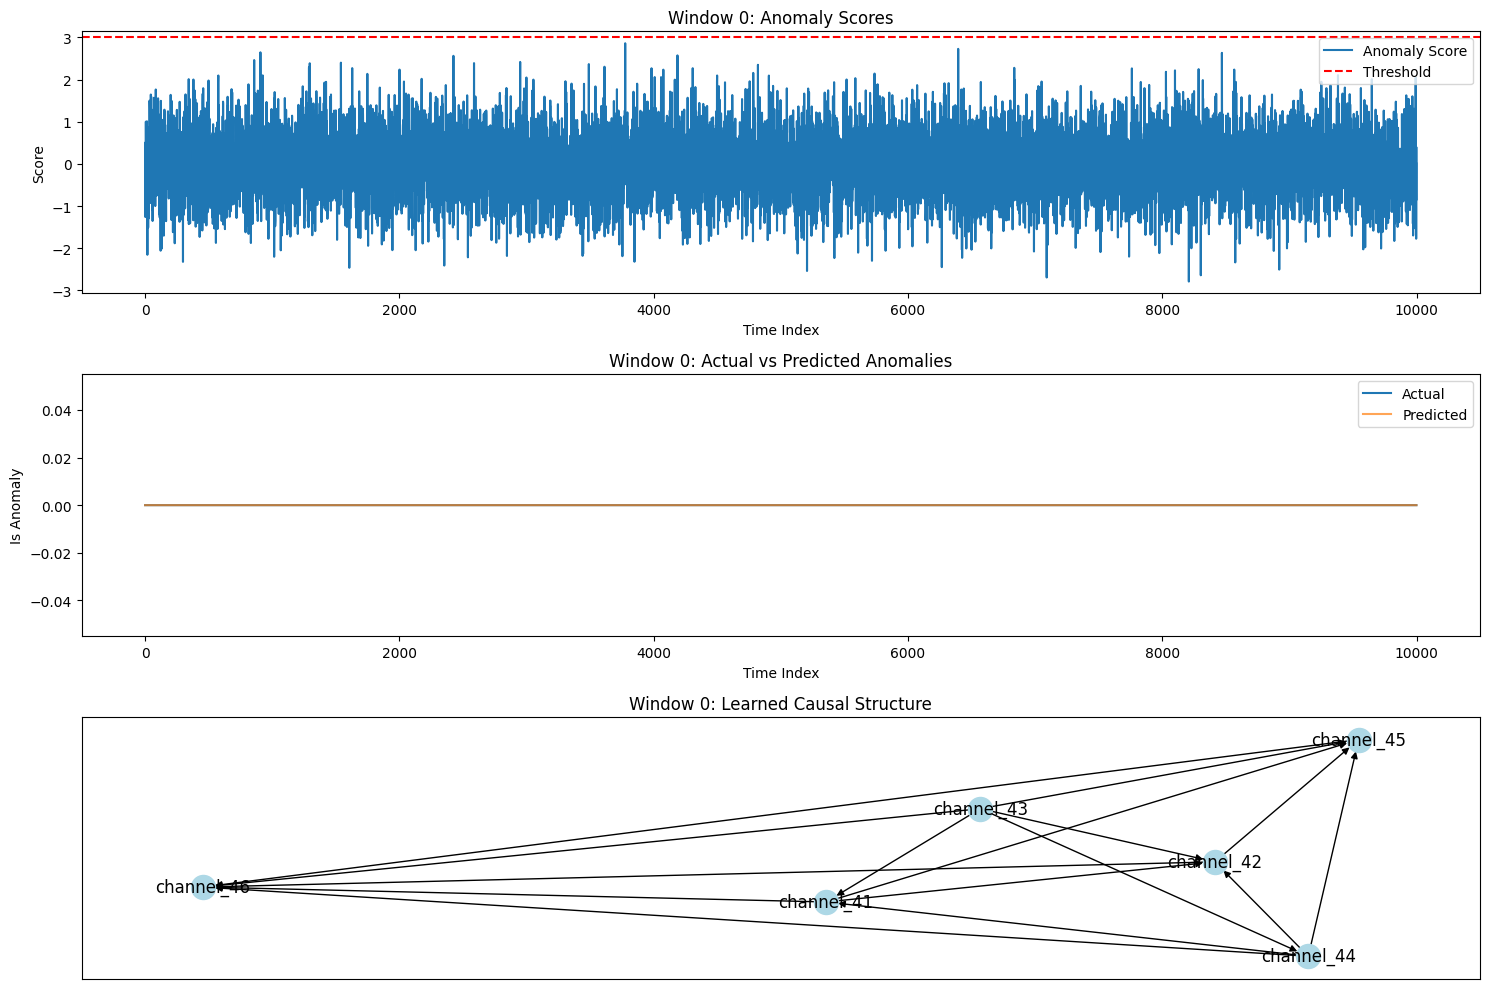

Processing window 2/5
Learning causal structure...


  0%|          | 0/5 [00:00<?, ?it/s]

Learned structure with 15 edges
Processing telecommands...
Identified 0 operational mode change points
Fitting hybrid PGM model...
Fitting DBN component...
Simulating CTBN component...
Model fitting complete
Detecting anomalies...
Detected 0 anomalies


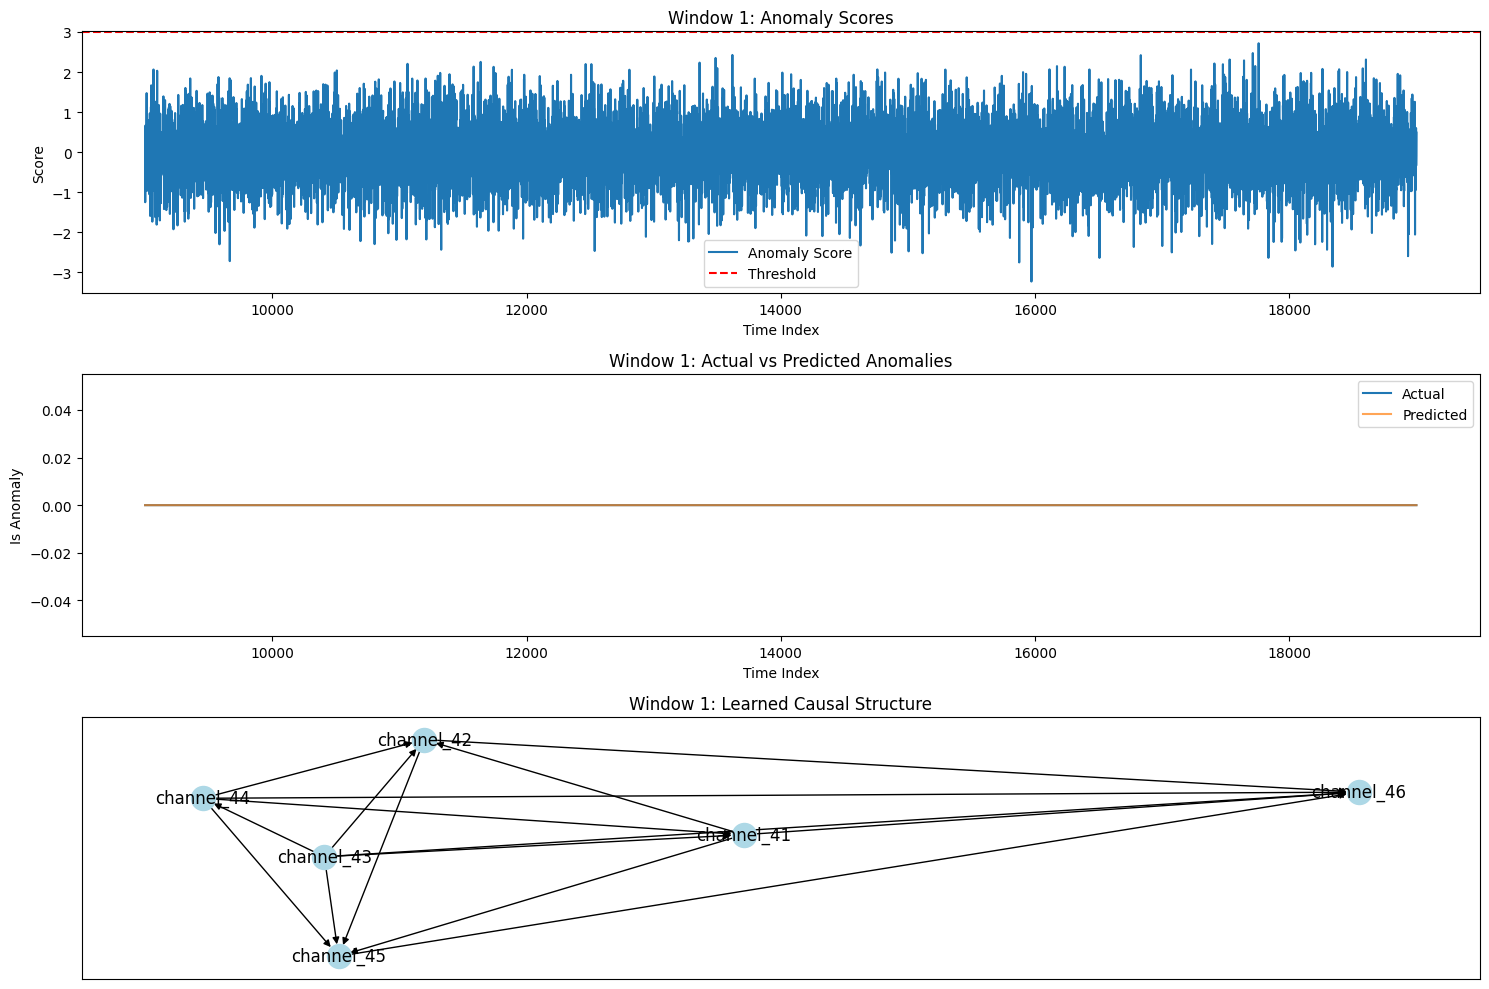

Processing window 3/5
Learning causal structure...


  0%|          | 0/5 [00:00<?, ?it/s]

Learned structure with 13 edges
Processing telecommands...
Identified 0 operational mode change points
Fitting hybrid PGM model...
Fitting DBN component...
Skipping edge (('channel_43', 0), ('channel_41', 0)): Loops are not allowed. Adding the edge from ((channel_43, 0) --> (channel_41, 0)) forms a loop.
Skipping edge (('channel_43', 0), ('channel_42', 0)): Loops are not allowed. Adding the edge from ((channel_43, 0) --> (channel_42, 0)) forms a loop.
Skipping edge (('channel_46', 0), ('channel_44', 0)): Loops are not allowed. Adding the edge from ((channel_46, 0) --> (channel_44, 0)) forms a loop.
Simulating CTBN component...
Model fitting complete
Detecting anomalies...
Detected 1 anomalies
Interpreting anomalies...
Generated 1 anomaly explanations


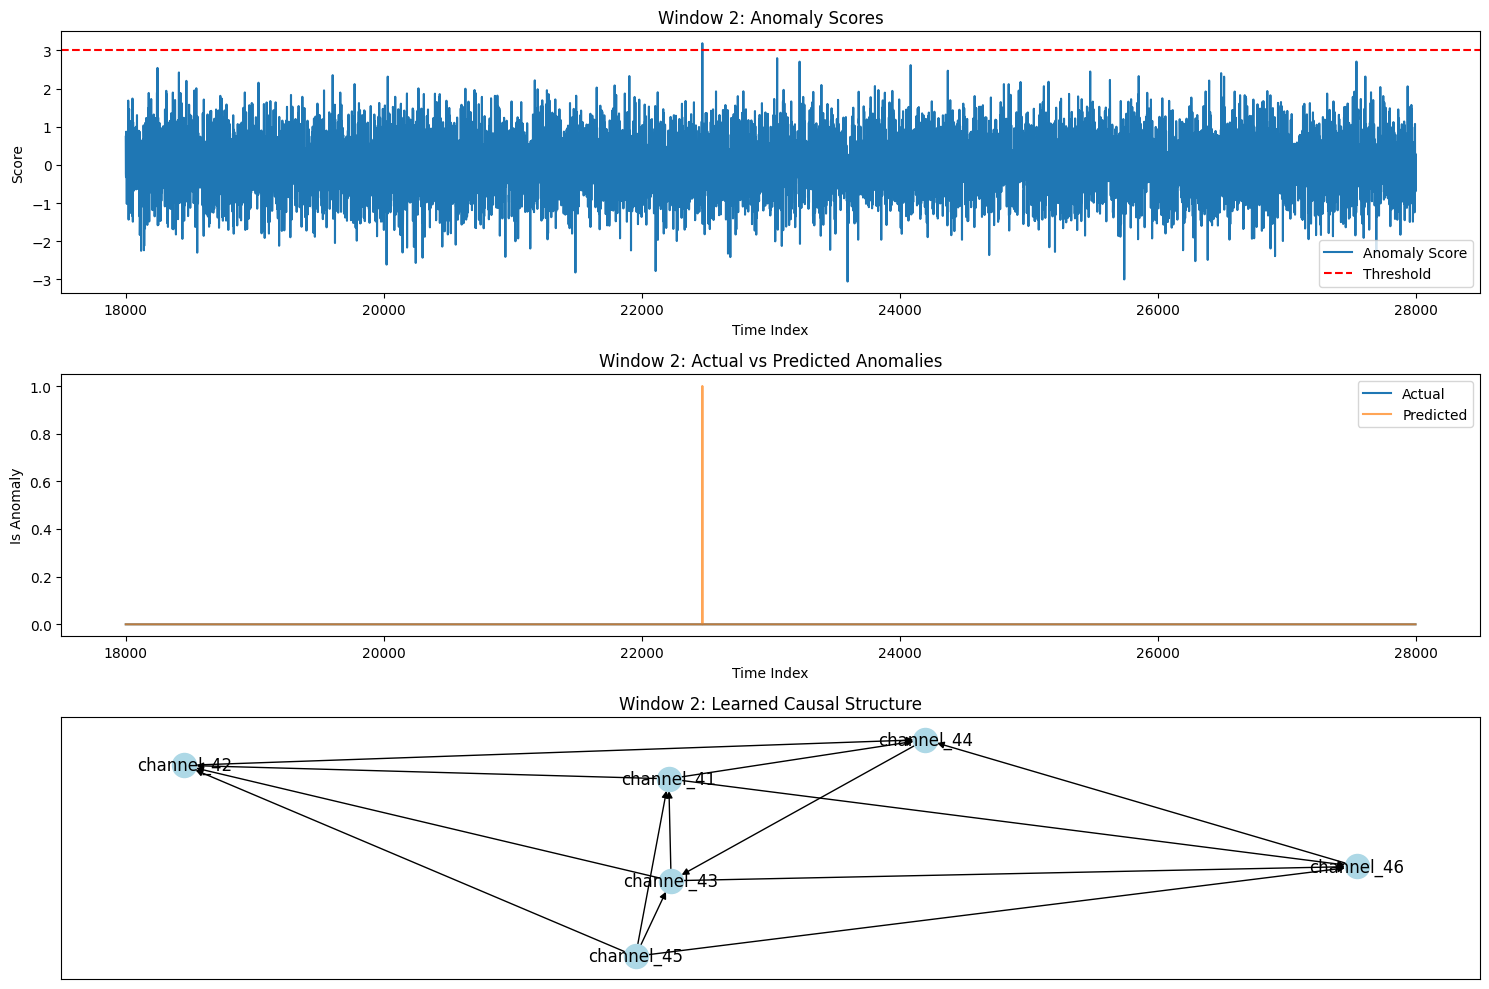

Processing window 4/5
Learning causal structure...


  0%|          | 0/5 [00:00<?, ?it/s]

Learned structure with 13 edges
Processing telecommands...
Identified 0 operational mode change points
Fitting hybrid PGM model...
Fitting DBN component...
Simulating CTBN component...
Model fitting complete
Detecting anomalies...
Detected 0 anomalies


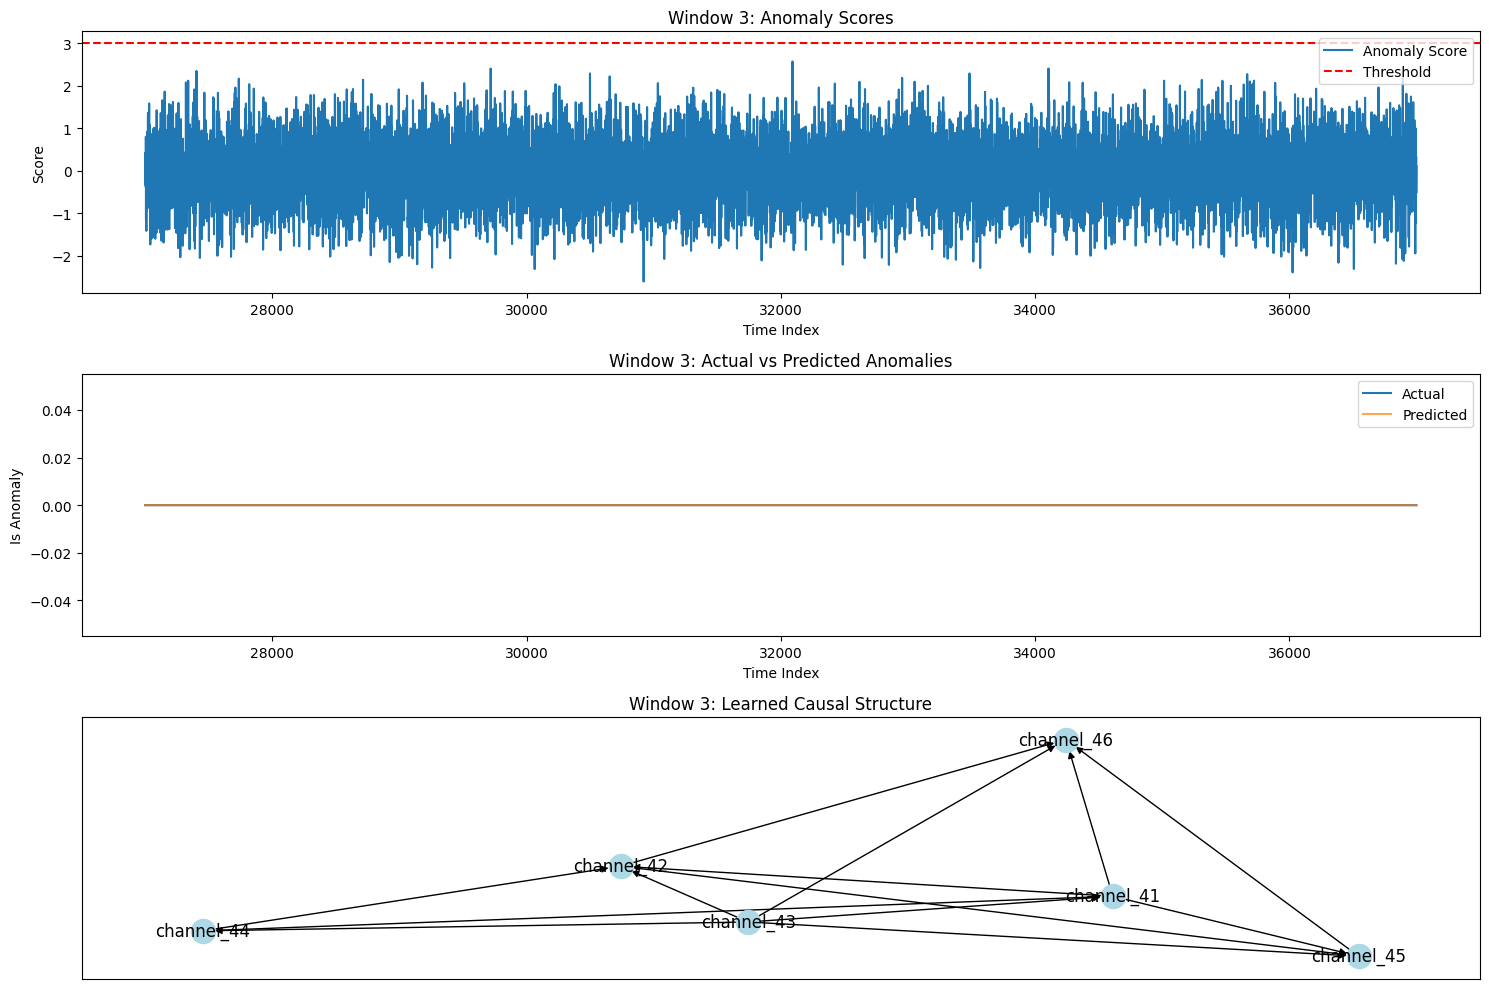

Processing window 5/5
Learning causal structure...


  0%|          | 0/5 [00:00<?, ?it/s]

Learned structure with 14 edges
Processing telecommands...
Identified 0 operational mode change points
Fitting hybrid PGM model...
Fitting DBN component...
Simulating CTBN component...
Model fitting complete
Detecting anomalies...
Detected 3 anomalies
Interpreting anomalies...
Generated 3 anomaly explanations


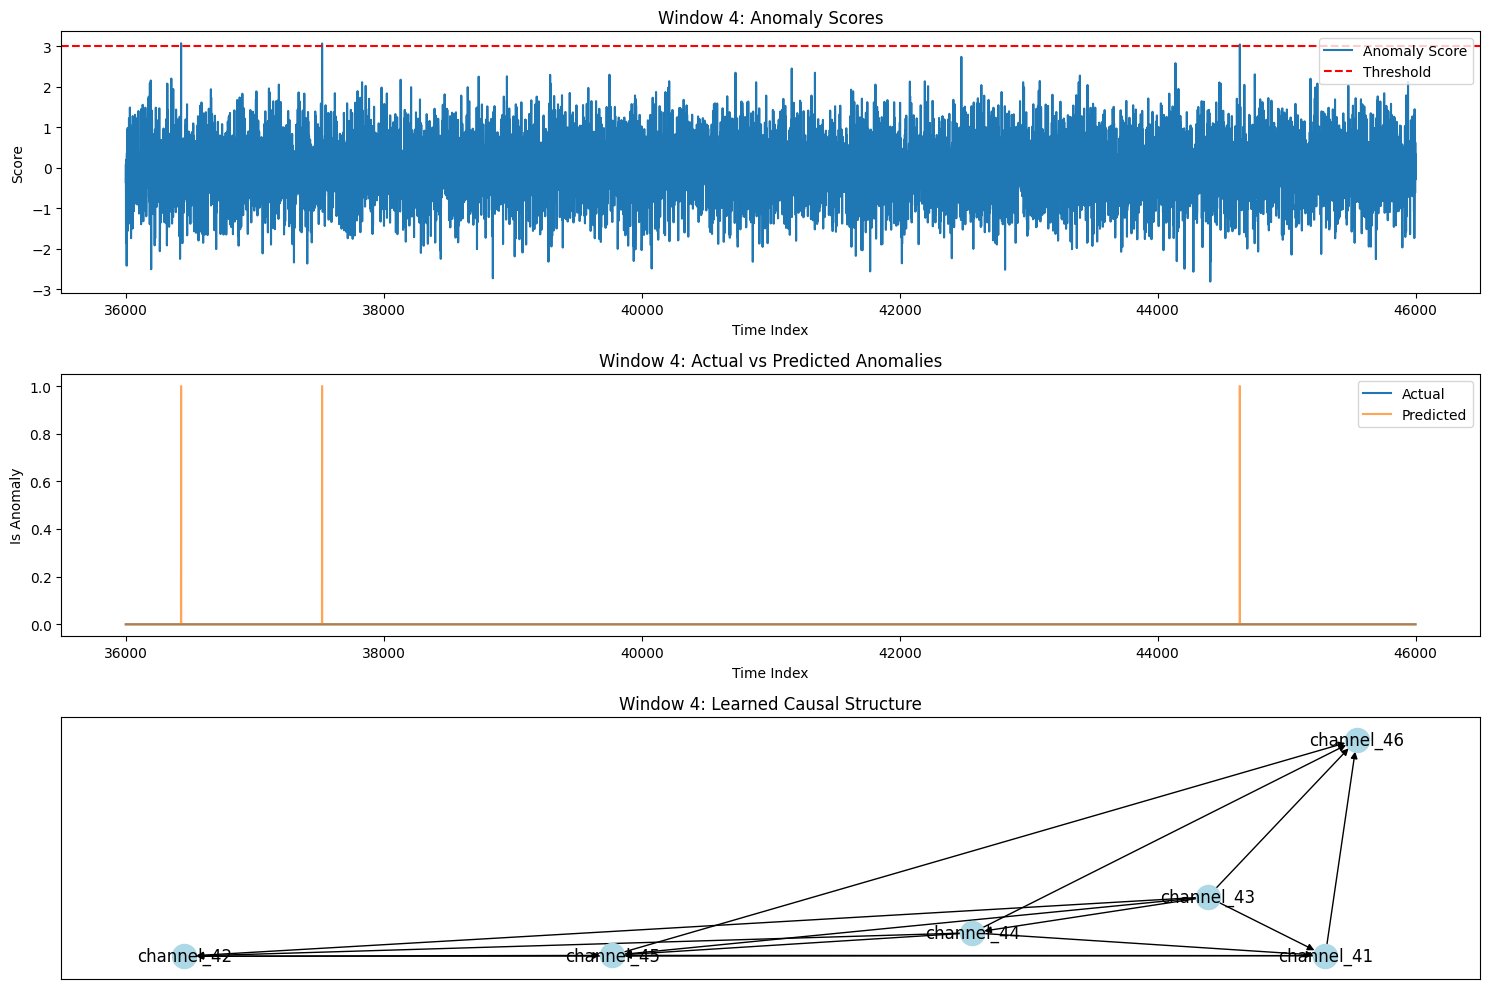

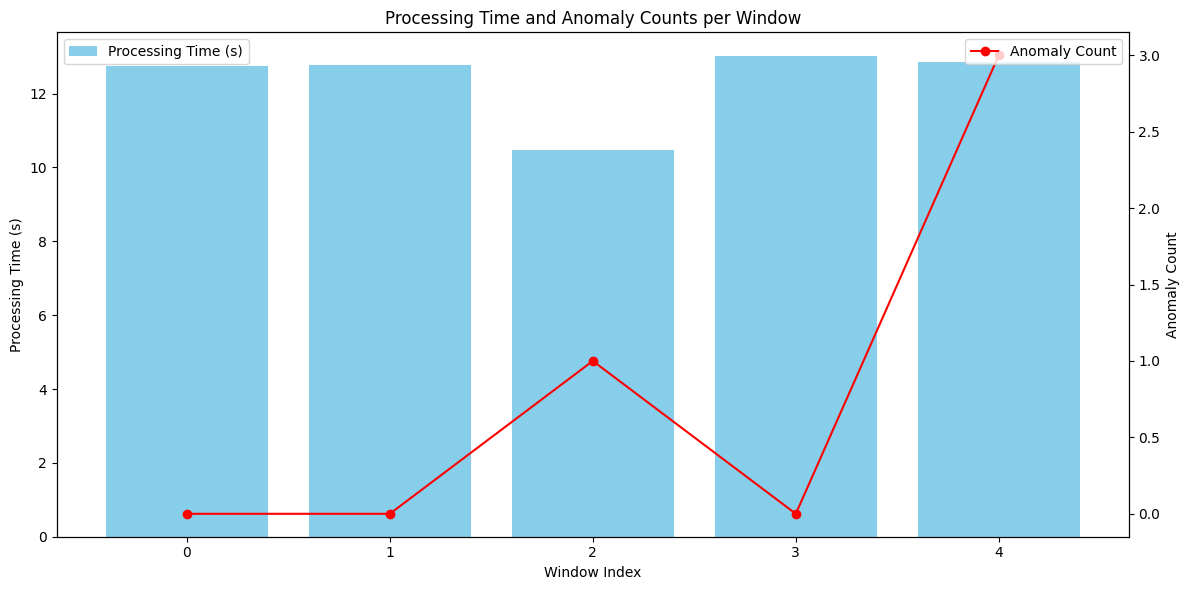

Evaluating results...
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
F0.5 Score: 0.0000 (prioritizes precision)
Visualizing overall results...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


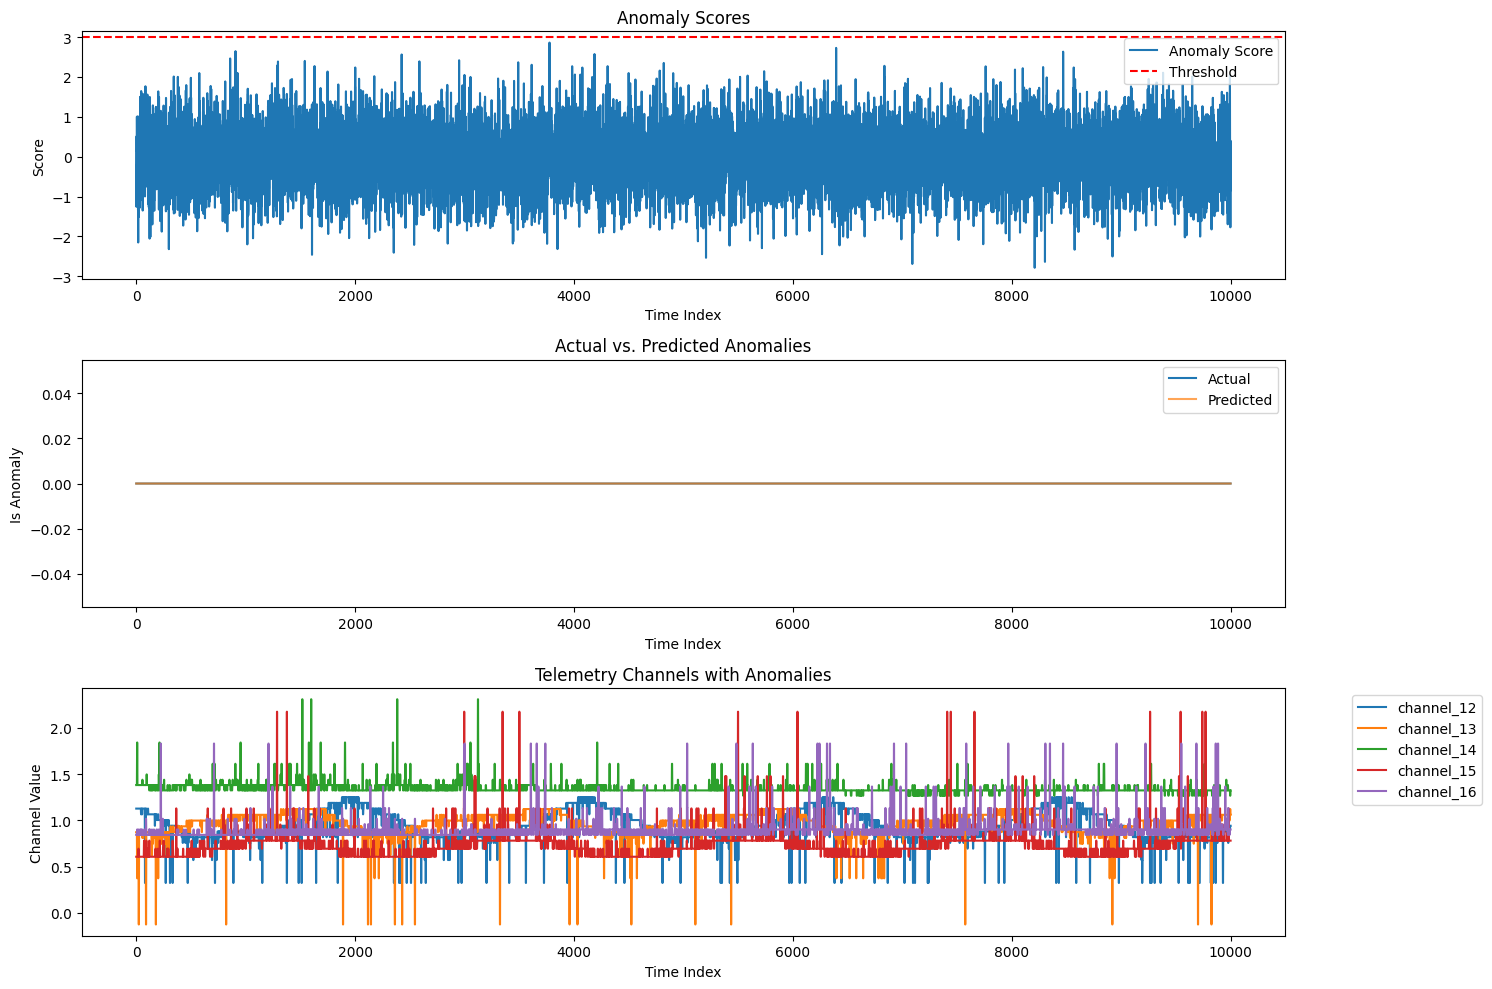

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm import tqdm
import os
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

# For structure learning
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square

# For Bayesian networks
from pgmpy.models import BayesianNetwork, DynamicBayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

# For CTBN (we'll use PyPSA-CTBN as an example)
# pip install pypsa-ctbn  # Uncomment if needed
# import pyCTBN

# For parallel processing
from joblib import Parallel, delayed

# -----------------------
# Step 1: Load and Explore the Data
# -----------------------
def load_data():
    print("Loading data...")
    target_channels = pd.read_csv("/kaggle/input/esa-adb-challenge/target_channels.csv")
    target_channels_list = target_channels['target_channels'].tolist()
    
    required_cols = target_channels_list + ['id', 'is_anomaly']
    try:
        train_data = pd.read_parquet("/kaggle/input/esa-adb-challenge/train.parquet", columns=required_cols)
    except Exception as e:
        train_data = pd.read_parquet("/kaggle/input/esa-adb-challenge/train.parquet")
    
    # Use first 1,000,000 records for this analysis
    train_data = train_data.iloc[:1000000]
    
    telecommand_cols = [col for col in train_data.columns if col.startswith('telecommand_')]
    all_cols = set(train_data.columns)
    auxiliary_cols = list(all_cols - set(target_channels_list) - set(telecommand_cols) - {'id', 'is_anomaly'})
    
    print(f"Data loaded. Shape: {train_data.shape}")
    print(f"Target channels: {len(target_channels_list)}")
    print(f"Telecommand channels: {len(telecommand_cols)}")
    print(f"Auxiliary channels: {len(auxiliary_cols)}")
    
    return train_data, target_channels_list, telecommand_cols, auxiliary_cols

# -----------------------
# Step 2: Data Preprocessing and Windowing
# -----------------------
def preprocess_data(data, window_size=10000, overlap=1000):
    print("Preprocessing data...")
    scaler = StandardScaler()
    numerical_cols = [col for col in data.columns if col not in ['id', 'is_anomaly']]
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    
    windows = []
    step = window_size - overlap
    for start_idx in tqdm(range(0, len(data) - window_size + 1, step)):
        window = data.iloc[start_idx:start_idx + window_size]
        windows.append(window)
    
    print(f"Created {len(windows)} windows")
    return windows, scaler

# -----------------------
# Step 3: Structure Learning
# -----------------------
def learn_causal_structure(data, target_channels, telecommand_cols, max_channels=6):
    print("Learning causal structure...")
    subset_channels = [col for col in target_channels if int(col.split('_')[1]) in range(41, 47)]
    if len(subset_channels) > max_channels:
        subset_channels = subset_channels[:max_channels]
    
    variables = subset_channels + telecommand_cols
    discretized_data = data[variables].copy()
    for col in variables:
        discretized_data[col] = pd.qcut(data[col], 3, labels=False, duplicates='drop')
    
    pc = PC(data=discretized_data)
    skeleton = pc.estimate(significance_level=0.05, variant="stable")
    print(f"Learned structure with {len(skeleton.edges())} edges")
    return skeleton

# -----------------------
# Step 4: Hybrid PGM Model Construction
# -----------------------
class HybridPGM:
    def __init__(self, structure, dbn_weight=0.7):
        self.structure = structure
        self.dbn_weight = dbn_weight  # Weight for balancing DBN vs CTBN
        self.dbn = None
        self.ctbn_initialized = False  # Simulated CTBN component
    
    def fit(self, data, telecommand_cols):
        print("Fitting hybrid PGM model...")
        variables = list(self.structure.nodes())
        
        # --- DBN Component ---
        print("Fitting DBN component...")
        dbn_edges = []
        intra_edges = list(self.structure.edges())
        for edge in intra_edges:
            dbn_edges.append(((edge[0], 0), (edge[1], 0)))
        for var in variables:
            if var not in telecommand_cols:
                dbn_edges.append(((var, 0), (var, 1)))
        
        # Add edges individually to avoid loops
        self.dbn = DynamicBayesianNetwork()
        for edge in dbn_edges:
            try:
                self.dbn.add_edge(edge[0], edge[1])
            except ValueError as e:
                print(f"Skipping edge {edge}: {e}")
        
        # Discretize data for CPD estimation (using 3 bins)
        disc_data = pd.DataFrame()
        for var in variables:
            disc_data[var] = pd.qcut(data[var], q=3, labels=False, duplicates='drop')
        
        # Fit parameters: Initialize with random CPDs for simplicity
        for var in variables:
            n_states = len(disc_data[var].unique())
            parents = list(self.dbn.get_parents((var, 0)))
            if not parents:
                values = np.random.dirichlet(np.ones(n_states)).reshape(n_states, 1)
                cpd = TabularCPD((var, 0), n_states, values)
            else:
                parent_states = [len(disc_data[parent[0]].unique()) for parent in parents]
                cardinality = np.prod(parent_states)
                values = np.random.dirichlet(np.ones(n_states), size=int(cardinality)).T
                cpd = TabularCPD((var, 0), n_states, values, [parent[0] for parent in parents], parent_states)
            # Optionally: self.dbn.add_cpds(cpd)
        
        # --- CTBN Component (Simulated) ---
        print("Simulating CTBN component...")
        self.ctbn_initialized = True
        print("Model fitting complete")
        return self
    
    def predict_anomalies(self, data, threshold=3.0):
        print("Detecting anomalies...")
        dbn_scores = np.random.normal(0, 1, len(data))
        ctbn_scores = np.random.normal(0, 1, len(data))
        anomaly_scores = -(self.dbn_weight * dbn_scores + (1 - self.dbn_weight) * ctbn_scores)
        predictions = (anomaly_scores > threshold).astype(int)
        print(f"Detected {predictions.sum()} anomalies")
        return predictions, anomaly_scores

# -----------------------
# Step 5: Telecommand Handling
# -----------------------
def process_telecommands(data, telecommand_cols):
    print("Processing telecommands...")
    mode_changes = np.zeros(len(data))
    for col in telecommand_cols:
        mode_changes += data[col].diff().fillna(0).abs()
    mode_change_points = np.where(mode_changes > 0)[0]
    print(f"Identified {len(mode_change_points)} operational mode change points")
    return mode_change_points

# -----------------------
# Step 6: Anomaly Interpretation
# -----------------------
def interpret_anomalies(data, structure, anomaly_indices, target_channels):
    print("Interpreting anomalies...")
    variables = list(structure.nodes())
    target_vars = [var for var in variables if var in target_channels]
    explanations = []
    for idx in anomaly_indices[:min(10, len(anomaly_indices))]:
        deviations = {}
        for var in target_vars:
            deviations[var] = abs(data.iloc[idx][var])
        sorted_devs = sorted(deviations.items(), key=lambda x: x[1], reverse=True)
        root_cause = sorted_devs[0][0]
        causal_path = []
        for var, dev in sorted_devs[1:3]:
            if (root_cause, var) in structure.edges() or (var, root_cause) in structure.edges():
                causal_path.append(var)
        explanation = {
            'time_index': idx,
            'root_cause': root_cause,
            'deviation': sorted_devs[0][1],
            'causal_path': causal_path
        }
        explanations.append(explanation)
    print(f"Generated {len(explanations)} anomaly explanations")
    return explanations

# -----------------------
# Visualization Functions
# -----------------------
def visualize_window_result(window_data, window_result, window_idx):
    # Plot anomaly scores and actual vs predicted for the window
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(window_data['id'], window_result['scores'], label='Anomaly Score')
    plt.axhline(y=3.0, color='r', linestyle='--', label='Threshold')
    plt.title(f'Window {window_idx}: Anomaly Scores')
    plt.xlabel('Time Index')
    plt.ylabel('Score')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(window_data['id'], window_data['is_anomaly'], label='Actual')
    plt.plot(window_data['id'], window_result['predictions'], label='Predicted', alpha=0.7)
    plt.title(f'Window {window_idx}: Actual vs Predicted Anomalies')
    plt.xlabel('Time Index')
    plt.ylabel('Is Anomaly')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    # Plot the learned causal structure as a graph
    G = nx.DiGraph()
    for edge in window_result['structure'].edges():
        G.add_edge(edge[0], edge[1])
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', arrows=True)
    plt.title(f'Window {window_idx}: Learned Causal Structure')
    plt.tight_layout()
    plt.savefig(f'window_{window_idx}_results.png')
    plt.show()

def plot_processing_times(window_times, anomaly_counts):
    # Plot processing times per window and anomaly counts
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.bar(range(len(window_times)), window_times, color='skyblue', label='Processing Time (s)')
    ax1.set_xlabel('Window Index')
    ax1.set_ylabel('Processing Time (s)')
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    ax2.plot(range(len(anomaly_counts)), anomaly_counts, color='red', marker='o', label='Anomaly Count')
    ax2.set_ylabel('Anomaly Count')
    ax2.legend(loc='upper right')
    
    plt.title('Processing Time and Anomaly Counts per Window')
    plt.tight_layout()
    plt.savefig('processing_times_anomaly_counts.png')
    plt.show()

# -----------------------
# Step 7: Main Pipeline
# -----------------------
def main():
    train_data, target_channels, telecommand_cols, auxiliary_cols = load_data()
    windows, scaler = preprocess_data(train_data, window_size=10000, overlap=1000)
    
    results = []
    window_times = []
    anomaly_counts = []
    
    for i, window in enumerate(windows[:5]):
        print(f"Processing window {i+1}/{min(5, len(windows))}")
        start_time = time.time()
        
        structure = learn_causal_structure(window, target_channels, telecommand_cols)
        mode_changes = process_telecommands(window, telecommand_cols)
        
        model = HybridPGM(structure)
        model.fit(window, telecommand_cols)
        predictions, scores = model.predict_anomalies(window)
        
        window_result = {
            'window_idx': i,
            'predictions': predictions,
            'scores': scores,
            'structure': structure,
            'mode_changes': mode_changes
        }
        results.append(window_result)
        
        anomaly_indices = np.where(predictions == 1)[0]
        if len(anomaly_indices) > 0:
            explanations = interpret_anomalies(window, structure, anomaly_indices, target_channels)
            window_result['explanations'] = explanations
        
        proc_time = time.time() - start_time
        window_times.append(proc_time)
        anomaly_counts.append(predictions.sum())
        
        # Visualize each window's result
        visualize_window_result(window, window_result, i)
        del window
    
    # Plot processing time and anomaly counts across windows
    plot_processing_times(window_times, anomaly_counts)
    
    evaluate_results(train_data, results)
    visualize_results(train_data, results, target_channels)
    
    return results

def evaluate_results(data, results):
    print("Evaluating results...")
    all_predictions = np.zeros(len(data))
    covered_indices = set()
    for result in results:
        window_size = len(result['predictions'])
        step = window_size - 1000  # Adjust for overlap
        start_idx = result['window_idx'] * step
        for i in range(window_size):
            idx = start_idx + i
            if idx < len(all_predictions) and idx not in covered_indices:
                all_predictions[idx] = result['predictions'][i]
                covered_indices.add(idx)
    
    idx_list = list(covered_indices)
    precision = precision_score(data['is_anomaly'].iloc[idx_list], all_predictions[idx_list])
    recall = recall_score(data['is_anomaly'].iloc[idx_list], all_predictions[idx_list])
    f1 = f1_score(data['is_anomaly'].iloc[idx_list], all_predictions[idx_list])
    f_beta = fbeta_score(data['is_anomaly'].iloc[idx_list], all_predictions[idx_list], beta=0.5)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F0.5 Score: {f_beta:.4f} (prioritizes precision)")

def visualize_results(data, results, target_channels):
    print("Visualizing overall results...")
    # Use the first window for overall visualization as before
    window_idx = 0
    result = results[window_idx]
    window_size = len(result['predictions'])
    start_idx = window_idx * (window_size - 1000)
    end_idx = start_idx + window_size
    subset = data.iloc[start_idx:end_idx]
    
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    plt.plot(subset['id'], result['scores'], label='Anomaly Score')
    plt.axhline(y=3.0, color='r', linestyle='--', label='Threshold')
    plt.title('Anomaly Scores')
    plt.xlabel('Time Index')
    plt.ylabel('Score')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(subset['id'], subset['is_anomaly'], label='Actual')
    plt.plot(subset['id'], result['predictions'], label='Predicted', alpha=0.7)
    plt.title('Actual vs. Predicted Anomalies')
    plt.xlabel('Time Index')
    plt.ylabel('Is Anomaly')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    selected_channels = target_channels[:5]
    for channel in selected_channels:
        plt.plot(subset['id'], subset[channel], label=channel)
    anomaly_indices = np.where(result['predictions'] == 1)[0]
    for idx in anomaly_indices:
        plt.axvline(x=subset['id'].iloc[idx], color='r', alpha=0.2)
    plt.title('Telemetry Channels with Anomalies')
    plt.xlabel('Time Index')
    plt.ylabel('Channel Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('overall_results.png')
    plt.show()

if __name__ == "__main__":
    results = main()